Урок 2. Обзор основных алгоритмов машинного обучения, используемых в соревнованиях

В домашнем задании, будем обучать разные алгоритмы машинного обучения. Для этого, нужно предварительно зафиксировать схему валидации решения (можете выбрать любую, которую знаете). Выбранную схему валидации нужно использовать во всех задачах этого домашнего задания. Метрика качества - ROC AUC, целевая переменная - isFraud.

Ссылка на данные - https://drive.google.com/file/d/1gMEVl47pIoV1-AseB9doQ6DZNJrY3NkW/view?usp=sharing

Задание 1: отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

Задание 2: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.

Задание 4: для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

Задание 5: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.

Задание 6: обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

Задание 7: для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

Задание 8: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

Задание 9: обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

Задание 10: построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.

Задание на повторение: Задание не обязательно к выполнению, но очень рекомендуется для понимания набора данных, этот набор данных будет использован и для следующего домашнего задания.

Задание 1: Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи. Задание 2: построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы. Задание 3: построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы. Задание 4: построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 36 kB/s 


In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import missingno as msno
import lightgbm as lgb
import catboost as cb
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
import warnings
warnings.simplefilter('ignore')
from catboost import Pool
from catboost.utils import get_roc_curve
from sklearn import metrics

In [ ]:
!unzip /content/drive/MyDrive/assignment2_data.zip

Archive:  /content/drive/MyDrive/assignment2_data.zip
  inflating: assignment_2_test.csv   
  inflating: assignment_2_train.csv  


In [ ]:
test = pd.read_csv('/content/assignment_2_test.csv')
train = pd.read_csv('/content/assignment_2_train.csv')

In [ ]:
def prin_roc(model,X_test,X_train,name):

#  тест   
    try:
        preds = probs = model.predict_proba(X_test)[:,1]      
    except:
        preds = model.predict(X_test)       
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'test AUC = %0.2f' % roc_auc,color='red')

#     трайн
    try:
        preds = model.predict_proba(X_train)[:,1]
    except:
        preds = model.predict(X_train)  
    fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'train AUC = %0.2f' % roc_auc,color='green')

    plt.title(name) 
    plt.legend()
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 541.1+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 300.6+ MB


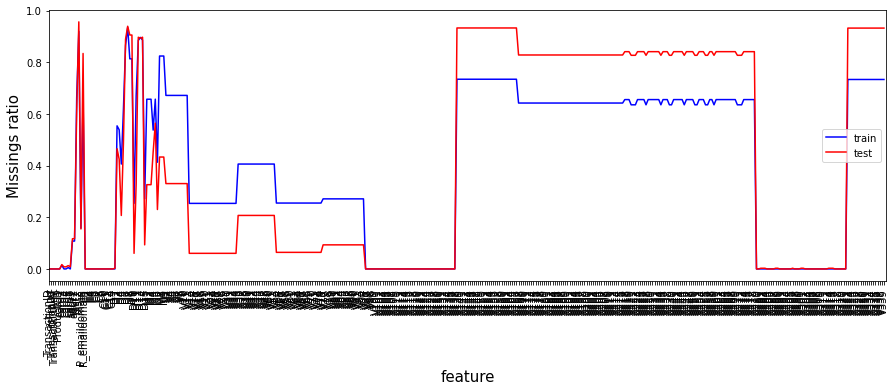

In [ ]:
fig = plt.figure(figsize=(15, 5))
plt.plot(train.isnull().mean(), label="train", color="blue")
plt.plot(test.isnull().mean(), label="test", color="red")
plt.xticks(range(train.shape[1]), train.columns, rotation=90)
plt.ylabel("Missings ratio", size=15)
plt.xlabel("feature", size=15)
plt.xlim(0, train.shape[1])
plt.legend()

Пропусков много

# Задание 1

In [ ]:
numerical_features = train.select_dtypes(include=[np.number]).columns # Выбирем числовые признаки

numerical_features = numerical_features.drop('isFraud') # уберем таргет

y_train = train['isFraud'] # создадим таргет
y_test = test['isFraud']

In [ ]:
train[numerical_features].head()

TransactionID  TransactionDT  TransactionAmt  card1  ...  V336  V337  V338  V339
0        2987000          86400            68.5  13926  ...   NaN   NaN   NaN   NaN
1        2987001          86401            29.0   2755  ...   NaN   NaN   NaN   NaN
2        2987002          86469            59.0   4663  ...   NaN   NaN   NaN   NaN
3        2987003          86499            50.0  18132  ...   NaN   NaN   NaN   NaN
4        2987004          86506            50.0   4497  ...   0.0   0.0   0.0   0.0

[5 rows x 379 columns]

In [ ]:
y_train.value_counts() #целевая переменная

0    174859
1      5141
Name: isFraud, dtype: int64

In [ ]:
print(f'положительный исход {(y_train.value_counts()[1]/y_train.value_counts().values.sum()*100).round(2)} %')

положительный исход 2.86 %


In [ ]:
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 10000,
    "reg_lambda": 50,
    "max_depth": 6,
    "gamma": 4,
    "nthread": 14,
    "seed": 27
}

In [ ]:
dtrain = xgb.DMatrix( data=train[numerical_features], label=y_train)
dvalid = xgb.DMatrix( data=test[numerical_features], label=y_test)

In [ ]:
%%time
model_xgb_num = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=10000,
    early_stopping_rounds=90,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    verbose_eval=25,
    maximize=True,
)

[0]	train-auc:0.644244	valid-auc:0.637321
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 90 rounds.
[25]	train-auc:0.869678	valid-auc:0.845099
[50]	train-auc:0.901048	valid-auc:0.854213
[75]	train-auc:0.917082	valid-auc:0.858085
[100]	train-auc:0.926716	valid-auc:0.861857
[125]	train-auc:0.931378	valid-auc:0.862877
[150]	train-auc:0.93566	valid-auc:0.863725
[175]	train-auc:0.939044	valid-auc:0.864818
[200]	train-auc:0.941756	valid-auc:0.863803
[225]	train-auc:0.9436	valid-auc:0.86316
[250]	train-auc:0.94525	valid-auc:0.863558
Stopping. Best iteration:
[171]	train-auc:0.938756	valid-auc:0.864876

CPU times: user 20min 14s, sys: 4.38 s, total: 20min 19s
Wall time: 5min 15s


In [ ]:
# Cross-Validation на train
cv_result_1 = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=10000,
    early_stopping_rounds=90,
    verbose_eval=25,
    stratified=True,
    metrics="auc",
    maximize=True,
    shuffle=True,
    nfold=5,
)

[0]	train-auc:0.66005+0.00913029	test-auc:0.653156+0.00970505
[25]	train-auc:0.863215+0.00165936	test-auc:0.858543+0.00391221
[50]	train-auc:0.900889+0.0012059	test-auc:0.891282+0.00234781
[75]	train-auc:0.91595+0.000806991	test-auc:0.902301+0.00118481
[100]	train-auc:0.925466+0.000714802	test-auc:0.909112+0.00103888
[125]	train-auc:0.931178+0.000458461	test-auc:0.913063+0.00125925
[150]	train-auc:0.935895+0.000576195	test-auc:0.91644+0.001468
[175]	train-auc:0.939076+0.000497592	test-auc:0.918541+0.00167146
[200]	train-auc:0.941319+0.000599868	test-auc:0.919981+0.00165423
[225]	train-auc:0.942785+0.00109741	test-auc:0.920842+0.0022629
[250]	train-auc:0.943501+0.00183626	test-auc:0.921366+0.00269152
[275]	train-auc:0.943687+0.00209634	test-auc:0.921457+0.00277766
[300]	train-auc:0.943687+0.00209634	test-auc:0.921457+0.00277766
[325]	train-auc:0.943687+0.00209634	test-auc:0.921457+0.00277766
[350]	train-auc:0.943687+0.00209634	test-auc:0.921457+0.00277766


# Задание 2

In [ ]:
object_features = train.select_dtypes(include=[np.object]).columns
print(object_features,
     len(object_features))

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'],
      dtype='object') 14


In [ ]:
train[object_features].head()

ProductCD       card4   card6 P_emaildomain  ...   M6   M7   M8   M9
0         W    discover  credit           NaN  ...    T  NaN  NaN  NaN
1         W  mastercard  credit     gmail.com  ...    T  NaN  NaN  NaN
2         W        visa   debit   outlook.com  ...    F    F    F    F
3         W  mastercard   debit     yahoo.com  ...    F  NaN  NaN  NaN
4         H  mastercard  credit     gmail.com  ...  NaN  NaN  NaN  NaN

[5 rows x 14 columns]

Заменим категории на цифры (в виде доли положительного таргета)

In [ ]:
A={}
for i in object_features:
    a={}
    value_counts=train[i].value_counts()
    for j in value_counts.index:
        a[j]=round(train[train[i]==j]['isFraud'].sum()/value_counts[j],10)*100
    A[i]=a

In [ ]:
train_1=train.copy()
test_1 = test.copy()

In [ ]:
for i in A:
    train_1[i] = train_1[i].map(A[i])
    test_1[i] = test_1[i].map(A[i])
train_1[object_features].head()

ProductCD     card4     card6  ...        M7        M8        M9
0   1.854269  3.658537  4.447046  ...       NaN       NaN       NaN
1   1.854269  3.199941  4.447046  ...       NaN       NaN       NaN
2   1.854269  2.733843  2.113307  ...  1.430784  1.544363  1.986331
3   1.854269  3.199941  2.113307  ...       NaN       NaN       NaN
4   2.546606  3.199941  4.447046  ...       NaN       NaN       NaN

[5 rows x 14 columns]

In [ ]:
test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Columns: 394 entries, TransactionID to V339
dtypes: float64(390), int64(4)
memory usage: 300.6 MB


In [ ]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Columns: 394 entries, TransactionID to V339
dtypes: float64(390), int64(4)
memory usage: 541.1 MB


In [ ]:
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 10000,
    "reg_lambda": 50,
    "max_depth": 10,
    "gamma": 4,
    "nthread": 14,
    "seed": 27
}

In [ ]:
dtrain = xgb.DMatrix( data=train_1[numerical_features.append(object_features)], label=y_train)
dvalid = xgb.DMatrix( data=test_1[numerical_features.append(object_features)], label=y_test)

In [ ]:
%%time
model_xgb_num_obj = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=10000,
    early_stopping_rounds=90,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    verbose_eval=25,
    maximize=True,
)

[0]	train-auc:0.655329	valid-auc:0.645407
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 90 rounds.
[25]	train-auc:0.884382	valid-auc:0.852153
[50]	train-auc:0.928578	valid-auc:0.864905
[75]	train-auc:0.945909	valid-auc:0.870321
[100]	train-auc:0.955243	valid-auc:0.874557
[125]	train-auc:0.959809	valid-auc:0.875341
[150]	train-auc:0.963615	valid-auc:0.874828
[175]	train-auc:0.966198	valid-auc:0.874422
[200]	train-auc:0.967594	valid-auc:0.873724
Stopping. Best iteration:
[123]	train-auc:0.959405	valid-auc:0.875404

CPU times: user 28min 26s, sys: 8 s, total: 28min 34s
Wall time: 7min 23s


In [ ]:
cv_result_2 = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=10000,
    early_stopping_rounds=90,
    verbose_eval=25,
    stratified=True,
    metrics="auc",
    maximize=True,
    shuffle=True,
    nfold=5,
)

[0]	train-auc:0.67018+0.00842654	test-auc:0.660894+0.0104776
[25]	train-auc:0.881511+0.00238754	test-auc:0.874501+0.00419795
[50]	train-auc:0.925593+0.00111046	test-auc:0.910374+0.00285146
[75]	train-auc:0.94356+0.00115784	test-auc:0.923755+0.00225073
[100]	train-auc:0.952343+0.000994272	test-auc:0.929618+0.00197396
[125]	train-auc:0.958126+0.000878873	test-auc:0.93331+0.00215017
[150]	train-auc:0.961898+0.00093322	test-auc:0.935829+0.00216837
[175]	train-auc:0.964248+0.000899707	test-auc:0.937385+0.00220807
[200]	train-auc:0.965787+0.00116993	test-auc:0.938347+0.00228375
[225]	train-auc:0.966242+0.00154841	test-auc:0.938604+0.00209184
[250]	train-auc:0.966473+0.00189294	test-auc:0.938739+0.0019712
[275]	train-auc:0.966473+0.00189294	test-auc:0.938739+0.0019712
[300]	train-auc:0.966473+0.00189294	test-auc:0.938739+0.0019712
[325]	train-auc:0.966473+0.00189294	test-auc:0.938739+0.0019712


# Задание 4

In [ ]:
params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.05,
    "n_estimators": 20000,
    "n_jobs": 14,
    "seed": 27
}

In [ ]:
dtrain = lgb.Dataset(data=train[numerical_features], label=y_train)
dvalid = lgb.Dataset(data=test[numerical_features], label=y_test)

In [ ]:
%%time
model_lgb_num = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=10000,
    valid_sets=[dtrain, dvalid],
    categorical_feature="auto",
    early_stopping_rounds=90,
    verbose_eval=25
)

Training until validation scores don't improve for 90 rounds.
[25]	training's auc: 0.89688	valid_1's auc: 0.854865
[50]	training's auc: 0.916063	valid_1's auc: 0.854353
[75]	training's auc: 0.930774	valid_1's auc: 0.855532
[100]	training's auc: 0.942597	valid_1's auc: 0.858704
[125]	training's auc: 0.949542	valid_1's auc: 0.860503
[150]	training's auc: 0.95539	valid_1's auc: 0.861762
[175]	training's auc: 0.960788	valid_1's auc: 0.862149
[200]	training's auc: 0.964793	valid_1's auc: 0.862612
[225]	training's auc: 0.967462	valid_1's auc: 0.861568
[250]	training's auc: 0.970705	valid_1's auc: 0.861545
[275]	training's auc: 0.973073	valid_1's auc: 0.861072
Early stopping, best iteration is:
[198]	training's auc: 0.964588	valid_1's auc: 0.862687
CPU times: user 2min 54s, sys: 9.96 s, total: 3min 4s
Wall time: 59.1 s


In [ ]:
cv_result_4 = lgb.cv(
    params=params,
    train_set=dtrain,
    num_boost_round=10000,
    categorical_feature="auto",
    early_stopping_rounds=90,
    verbose_eval=25,
    stratified=True,
    shuffle=True,
    nfold=5, 
)

[25]	cv_agg's auc: 0.887968 + 0.00232058
[50]	cv_agg's auc: 0.902633 + 0.00160847
[75]	cv_agg's auc: 0.912954 + 0.00129753
[100]	cv_agg's auc: 0.919966 + 0.00142979
[125]	cv_agg's auc: 0.92444 + 0.0013705
[150]	cv_agg's auc: 0.928394 + 0.0018789
[175]	cv_agg's auc: 0.931182 + 0.00199366
[200]	cv_agg's auc: 0.933586 + 0.00207415
[225]	cv_agg's auc: 0.935408 + 0.00218673
[250]	cv_agg's auc: 0.936935 + 0.00223302
[275]	cv_agg's auc: 0.938607 + 0.00244827
[300]	cv_agg's auc: 0.940046 + 0.00240382
[325]	cv_agg's auc: 0.941004 + 0.00242749
[350]	cv_agg's auc: 0.941889 + 0.00259047
[375]	cv_agg's auc: 0.942692 + 0.00249497
[400]	cv_agg's auc: 0.943322 + 0.00247135
[425]	cv_agg's auc: 0.944101 + 0.00251004
[450]	cv_agg's auc: 0.944901 + 0.00256841
[475]	cv_agg's auc: 0.945454 + 0.00248537
[500]	cv_agg's auc: 0.946186 + 0.00262338
[525]	cv_agg's auc: 0.946783 + 0.00272769
[550]	cv_agg's auc: 0.94761 + 0.00257229
[575]	cv_agg's auc: 0.948265 + 0.00260833
[600]	cv_agg's auc: 0.948564 + 0.00273035

# Задание 5

In [ ]:
dtrain = lgb.Dataset(data=train_1[numerical_features.append(object_features)], label=y_train)
dvalid = lgb.Dataset(data=test_1[numerical_features.append(object_features)], label=y_test)

In [ ]:
%%time
model_lgb_num_obj = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=10000,
    valid_sets=[dtrain, dvalid],
    categorical_feature="auto",
    early_stopping_rounds=90,
    verbose_eval=25
)

Training until validation scores don't improve for 90 rounds.
[25]	training's auc: 0.904579	valid_1's auc: 0.858306
[50]	training's auc: 0.926996	valid_1's auc: 0.8655
[75]	training's auc: 0.941577	valid_1's auc: 0.868426
[100]	training's auc: 0.95211	valid_1's auc: 0.872167
[125]	training's auc: 0.957999	valid_1's auc: 0.87289
[150]	training's auc: 0.964004	valid_1's auc: 0.873272
[175]	training's auc: 0.968215	valid_1's auc: 0.874396
[200]	training's auc: 0.972286	valid_1's auc: 0.873815
[225]	training's auc: 0.976163	valid_1's auc: 0.874918
[250]	training's auc: 0.978269	valid_1's auc: 0.874258
[275]	training's auc: 0.980176	valid_1's auc: 0.873654
[300]	training's auc: 0.982153	valid_1's auc: 0.872632
Early stopping, best iteration is:
[222]	training's auc: 0.975783	valid_1's auc: 0.875016
CPU times: user 3min 15s, sys: 11.1 s, total: 3min 27s
Wall time: 1min 6s


In [ ]:
cv_result_5 = lgb.cv(
    params=params,
    train_set=dtrain,
    num_boost_round=10000,
    categorical_feature="auto",
    early_stopping_rounds=20,
    verbose_eval=25,
    stratified=True,
    shuffle=True,
    nfold=5, 
)

[25]	cv_agg's auc: 0.897001 + 0.00335553
[50]	cv_agg's auc: 0.911956 + 0.00253547
[75]	cv_agg's auc: 0.922504 + 0.00288995
[100]	cv_agg's auc: 0.929352 + 0.00206344
[125]	cv_agg's auc: 0.933986 + 0.00190232
[150]	cv_agg's auc: 0.937394 + 0.00290319
[175]	cv_agg's auc: 0.939556 + 0.00266776
[200]	cv_agg's auc: 0.941267 + 0.00270203
[225]	cv_agg's auc: 0.943047 + 0.00268675
[250]	cv_agg's auc: 0.944561 + 0.00264054
[275]	cv_agg's auc: 0.945962 + 0.00239827
[300]	cv_agg's auc: 0.946931 + 0.00230737
[325]	cv_agg's auc: 0.948116 + 0.00225853
[350]	cv_agg's auc: 0.949329 + 0.00207751
[375]	cv_agg's auc: 0.950252 + 0.00188787
[400]	cv_agg's auc: 0.950963 + 0.00200541
[425]	cv_agg's auc: 0.951635 + 0.00212033
[450]	cv_agg's auc: 0.952243 + 0.00227703
[475]	cv_agg's auc: 0.952801 + 0.00225641
[500]	cv_agg's auc: 0.953236 + 0.00230942
[525]	cv_agg's auc: 0.95376 + 0.00253187
[550]	cv_agg's auc: 0.954286 + 0.00258196
[575]	cv_agg's auc: 0.954788 + 0.00261535
[600]	cv_agg's auc: 0.955128 + 0.00269

# Задание 6

In [ ]:
train[object_features]= train[object_features].astype('category')
test[object_features]= test[object_features].astype('category')

In [ ]:
dtrain = lgb.Dataset(data=train[numerical_features.append(object_features)], label=y_train,categorical_feature=object_features.to_list())
dvalid = lgb.Dataset(data=test[numerical_features.append(object_features)], label=y_test,categorical_feature=object_features.to_list())

In [ ]:
params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.05,
    "n_estimators": 20000,
    "n_jobs": 14,
    "seed": 27
}

In [ ]:
%%time
model_lgb_num_cat = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=10000,
    valid_sets=[dtrain, dvalid],
    categorical_feature=object_features.to_list(),
    early_stopping_rounds=90,
    verbose_eval=25
)

Training until validation scores don't improve for 90 rounds.
[25]	training's auc: 0.903957	valid_1's auc: 0.856424
[50]	training's auc: 0.924345	valid_1's auc: 0.862946
[75]	training's auc: 0.94088	valid_1's auc: 0.866729
[100]	training's auc: 0.952401	valid_1's auc: 0.872332
[125]	training's auc: 0.95946	valid_1's auc: 0.872575
[150]	training's auc: 0.964462	valid_1's auc: 0.872549
[175]	training's auc: 0.968845	valid_1's auc: 0.872638
[200]	training's auc: 0.972633	valid_1's auc: 0.872574
[225]	training's auc: 0.9758	valid_1's auc: 0.872205
[250]	training's auc: 0.97829	valid_1's auc: 0.872005
Early stopping, best iteration is:
[163]	training's auc: 0.966668	valid_1's auc: 0.872697
CPU times: user 2min 49s, sys: 8.86 s, total: 2min 57s
Wall time: 57.5 s


In [ ]:
cv_result_6 = lgb.cv(
    params=params,
    train_set=dtrain,
    num_boost_round=10000,
    categorical_feature=object_features.to_list(),
    early_stopping_rounds=20,
    verbose_eval=25,
    stratified=True,
    shuffle=True,
    nfold=5, 
)

[25]	cv_agg's auc: 0.894947 + 0.00231434
[50]	cv_agg's auc: 0.910909 + 0.00183798
[75]	cv_agg's auc: 0.92127 + 0.00134117
[100]	cv_agg's auc: 0.927197 + 0.00123197
[125]	cv_agg's auc: 0.932176 + 0.00207828
[150]	cv_agg's auc: 0.935906 + 0.00204952
[175]	cv_agg's auc: 0.938784 + 0.00256756
[200]	cv_agg's auc: 0.941475 + 0.0031131
[225]	cv_agg's auc: 0.943096 + 0.00360998
[250]	cv_agg's auc: 0.94459 + 0.00354294
[275]	cv_agg's auc: 0.946178 + 0.00337133
[300]	cv_agg's auc: 0.947285 + 0.00332512
[325]	cv_agg's auc: 0.948465 + 0.00371334
[350]	cv_agg's auc: 0.949217 + 0.00386237
[375]	cv_agg's auc: 0.949888 + 0.0037318
[400]	cv_agg's auc: 0.950477 + 0.0038212
[425]	cv_agg's auc: 0.950941 + 0.00382926
[450]	cv_agg's auc: 0.951804 + 0.00370446
[475]	cv_agg's auc: 0.952496 + 0.00380004
[500]	cv_agg's auc: 0.953092 + 0.00356462
[525]	cv_agg's auc: 0.953581 + 0.00337091
[550]	cv_agg's auc: 0.953943 + 0.00335654
[575]	cv_agg's auc: 0.954299 + 0.00335849
[600]	cv_agg's auc: 0.954701 + 0.00349805


# Задание 7

In [ ]:
cb_params = {
    "n_estimators": 1000,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "CPU",
    "max_bin": 20,
    "verbose": 50,
    "max_depth": 12,
    "l2_leaf_reg": 20,
    "early_stopping_rounds": 90,
    "thread_count": 14,
    "random_seed": 42,
    'custom_metric':  ['AUC', 'Logloss']
}

In [ ]:
train_pool = cb.Pool(train[numerical_features], y_train)
valid_pool = cb.Pool(test[numerical_features], y_test)

In [ ]:
%%time
model_cb_num = cb.CatBoostClassifier(**cb_params)
model_cb_num.fit(train_pool, eval_set=valid_pool,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6786937	best: 0.6786937 (0)	total: 823ms	remaining: 13m 42s
50:	test: 0.8413605	best: 0.8433392 (43)	total: 39.5s	remaining: 12m 14s
100:	test: 0.8490055	best: 0.8490055 (100)	total: 1m 18s	remaining: 11m 38s
150:	test: 0.8573409	best: 0.8573409 (150)	total: 1m 57s	remaining: 11m 3s
200:	test: 0.8592894	best: 0.8593899 (199)	total: 2m 37s	remaining: 10m 25s
250:	test: 0.8606600	best: 0.8607493 (242)	total: 3m 16s	remaining: 9m 45s
300:	test: 0.8606115	best: 0.8611123 (275)	total: 3m 52s	remaining: 9m
350:	test: 0.8606634	best: 0.8611123 (275)	total: 4m 26s	remaining: 8m 13s
Stopped by overfitting detector  (90 iterations wait)

bestTest = 0.8611123222
bestIteration = 275

Shrink model to first 276 iterations.
CPU times: user 17min 32s, sys: 5.45 s, total: 17min 38s
Wall time: 4min 38s


In [ ]:
cv_result_7 = cb.cv(
    train_pool,
    cb_params,
    plot=True,
    fold_count=5
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]
0:	test: 0.6948115	best: 0.6948115 (0)	total: 697ms	remaining: 11m 36s
50:	test: 0.8701567	best: 0.8701567 (50)	total: 34.1s	remaining: 10m 34s
100:	test: 0.8886888	best: 0.8886888 (100)	total: 1m 8s	remaining: 10m 6s
150:	test: 0.8993147	best: 0.8993147 (150)	total: 1m 42s	remaining: 9m 35s
200:	test: 0.9066712	best: 0.9066712 (200)	total: 2m 16s	remaining: 9m 3s
250:	test: 0.9087234	best: 0.9087234 (250)	total: 2m 49s	remaining: 8m 27s
300:	test: 0.9089927	best: 0.9089927 (300)	total: 3m 21s	remaining: 7m 47s
350:	test: 0.9112837	best: 0.9112837 (350)	total: 3m 55s	remaining: 7m 14s
400:	test: 0.9155014	best: 0.9155014 (400)	total: 4m 29s	remaining: 6m 43s
450:	test: 0.9182276	best: 0.9182288 (449)	total: 5m 3s	remaining: 6m 9s
500:	test: 0.9220271	best: 0.9220271 (500)	total: 5m 38s	remaining: 5m 37s
550:	test: 0.9242283	best: 0.9242463 (547)	total: 6m 13s	remaining: 5m 4s
600:	test: 0.9252756	best: 0.9252756 (600)	total: 6m 48s	remaining: 4m 30s
650:	test: 0.

# Задание 8

In [ ]:
train_pool = cb.Pool(train_1[numerical_features.append(object_features)], y_train)
valid_pool = cb.Pool(test_1[numerical_features.append(object_features)], y_test)

In [ ]:
%%time 
model_cb_num_obj= cb.CatBoostClassifier(**cb_params)
model_cb_num_obj.fit(train_pool, eval_set=valid_pool,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6949307	best: 0.6949307 (0)	total: 806ms	remaining: 13m 24s
50:	test: 0.8520456	best: 0.8521907 (49)	total: 40.5s	remaining: 12m 33s
100:	test: 0.8572429	best: 0.8572429 (100)	total: 1m 20s	remaining: 11m 57s
150:	test: 0.8618299	best: 0.8619834 (149)	total: 2m	remaining: 11m 19s
200:	test: 0.8662599	best: 0.8662599 (200)	total: 2m 41s	remaining: 10m 40s
250:	test: 0.8685453	best: 0.8685453 (250)	total: 3m 21s	remaining: 9m 59s
300:	test: 0.8693636	best: 0.8693712 (298)	total: 4m 1s	remaining: 9m 20s
350:	test: 0.8696096	best: 0.8697380 (330)	total: 4m 38s	remaining: 8m 35s
400:	test: 0.8694326	best: 0.8697380 (330)	total: 5m 16s	remaining: 7m 52s
450:	test: 0.8703713	best: 0.8704473 (439)	total: 5m 56s	remaining: 7m 14s
500:	test: 0.8716742	best: 0.8716742 (500)	total: 6m 38s	remaining: 6m 36s
550:	test: 0.8720691	best: 0.8720691 (550)	total: 7m 19s	remaining: 5m 57s
600:	test: 0.8726984	best: 0.8727519 (577)	total: 8m	remaining: 5m 18s
650:	test: 0.8728140	best: 0.8728182 

In [ ]:
cv_result_8 = cb.cv(
    train_pool,
    cb_params,
    plot=True,
    fold_count=5
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]
0:	test: 0.7076948	best: 0.7076948 (0)	total: 696ms	remaining: 11m 35s
50:	test: 0.8797065	best: 0.8797065 (50)	total: 35.4s	remaining: 10m 58s
100:	test: 0.8978149	best: 0.8978149 (100)	total: 1m 10s	remaining: 10m 26s
150:	test: 0.9088629	best: 0.9088629 (150)	total: 1m 45s	remaining: 9m 54s
200:	test: 0.9162479	best: 0.9162497 (199)	total: 2m 20s	remaining: 9m 20s
250:	test: 0.9195118	best: 0.9195118 (250)	total: 2m 55s	remaining: 8m 44s
300:	test: 0.9214752	best: 0.9214752 (300)	total: 3m 30s	remaining: 8m 8s
350:	test: 0.9228620	best: 0.9228620 (350)	total: 4m 4s	remaining: 7m 31s
400:	test: 0.9259647	best: 0.9259647 (400)	total: 4m 39s	remaining: 6m 57s
450:	test: 0.9295544	best: 0.9295544 (450)	total: 5m 15s	remaining: 6m 23s
500:	test: 0.9313007	best: 0.9313007 (500)	total: 5m 50s	remaining: 5m 49s
550:	test: 0.9328145	best: 0.9328145 (550)	total: 6m 26s	remaining: 5m 14s
600:	test: 0.9345167	best: 0.9345167 (600)	total: 7m 2s	remaining: 4m 40s
650:	test:

# Задание 9

In [ ]:
train[object_features] = train[object_features].astype(str)
test[object_features] = test[object_features].astype(str)

In [ ]:
train_pool = cb.Pool(train[numerical_features.append(object_features)], y_train,cat_features=object_features.to_list())
valid_pool = cb.Pool(test[numerical_features.append(object_features)], y_test,cat_features=object_features.to_list())

In [ ]:
%%time 
model_cb_num_cat = cb.CatBoostClassifier(**cb_params)
model_cb_num_cat.fit(train_pool, eval_set=valid_pool,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6748865	best: 0.6748865 (0)	total: 1.84s	remaining: 30m 43s
50:	test: 0.8497185	best: 0.8507161 (48)	total: 1m 28s	remaining: 27m 23s
100:	test: 0.8573544	best: 0.8574908 (99)	total: 2m 57s	remaining: 26m 18s
150:	test: 0.8624716	best: 0.8625979 (148)	total: 4m 29s	remaining: 25m 15s
200:	test: 0.8662463	best: 0.8662463 (200)	total: 6m	remaining: 23m 53s
250:	test: 0.8692055	best: 0.8692055 (250)	total: 7m 32s	remaining: 22m 29s
300:	test: 0.8711497	best: 0.8712197 (297)	total: 8m 56s	remaining: 20m 44s
350:	test: 0.8713756	best: 0.8713817 (347)	total: 10m 7s	remaining: 18m 43s
400:	test: 0.8717697	best: 0.8717939 (396)	total: 11m 20s	remaining: 16m 57s
450:	test: 0.8724539	best: 0.8725097 (443)	total: 12m 48s	remaining: 15m 35s
500:	test: 0.8730156	best: 0.8730168 (499)	total: 14m 19s	remaining: 14m 15s
550:	test: 0.8731767	best: 0.8731767 (550)	total: 15m 43s	remaining: 12m 48s
600:	test: 0.8735755	best: 0.8735755 (600)	total: 17m 13s	remaining: 11m 26s
650:	test: 0.873384

In [ ]:
cv_result_9 = cb.cv(
    train_pool,
    cb_params,
    plot=True,
    fold_count=5
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]
0:	test: 0.6740855	best: 0.6740855 (0)	total: 1.28s	remaining: 21m 19s
50:	test: 0.8762060	best: 0.8762060 (50)	total: 1m 12s	remaining: 22m 37s
100:	test: 0.8961097	best: 0.8961097 (100)	total: 2m 26s	remaining: 21m 45s
150:	test: 0.9067049	best: 0.9067049 (150)	total: 3m 41s	remaining: 20m 46s
200:	test: 0.9132200	best: 0.9132200 (200)	total: 4m 57s	remaining: 19m 43s
250:	test: 0.9177670	best: 0.9177670 (250)	total: 6m 9s	remaining: 18m 21s
300:	test: 0.9192501	best: 0.9192501 (300)	total: 7m 10s	remaining: 16m 39s
350:	test: 0.9208734	best: 0.9208734 (350)	total: 8m 13s	remaining: 15m 13s
400:	test: 0.9238964	best: 0.9238964 (400)	total: 9m 27s	remaining: 14m 7s
450:	test: 0.9266375	best: 0.9266375 (450)	total: 10m 44s	remaining: 13m 4s
500:	test: 0.9282756	best: 0.9282756 (500)	total: 12m	remaining: 11m 57s
550:	test: 0.9301096	best: 0.9301096 (550)	total: 13m 14s	remaining: 10m 47s
600:	test: 0.9310584	best: 0.9310584 (600)	total: 14m 28s	remaining: 9m 36s


# Задание 10

In [ ]:
X_train_1 = xgb.DMatrix( data=train[numerical_features], label=y_train)
X_test_1 = xgb.DMatrix( data=test[numerical_features], label=y_test)
X_train_2 = xgb.DMatrix( data=train_1[numerical_features.append(object_features)], label=y_train)
X_test_2 = xgb.DMatrix( data=test_1[numerical_features.append(object_features)], label=y_test)
X_train_3 = train[numerical_features]
X_test_3= test[numerical_features]
X_train_4 = train_1[numerical_features.append(object_features)]
X_test_4= test_1[numerical_features.append(object_features)]

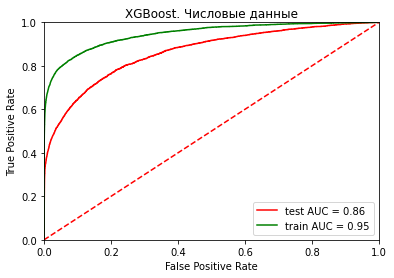

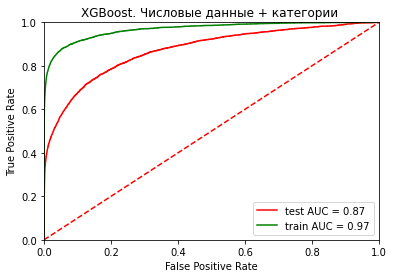

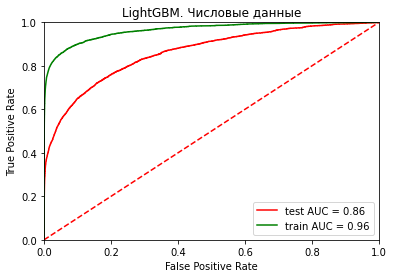

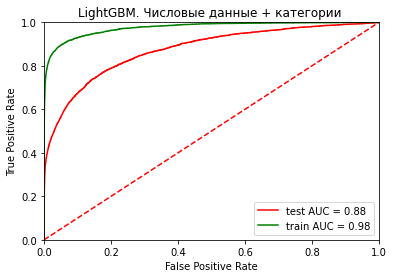

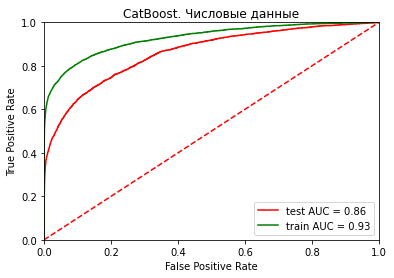

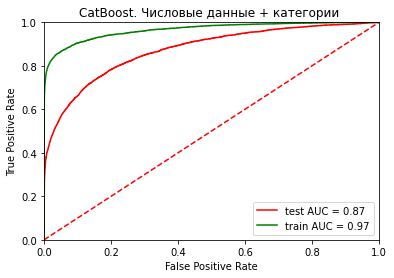

In [ ]:
prin_roc(model_xgb_num,X_test_1,X_train_1,'XGBoost. Числовые данные')
prin_roc(model_xgb_num_obj, X_test_2,X_train_2,'XGBoost. Числовые данные + категории ')

prin_roc(model_lgb_num,X_test_3,X_train_3,'LightGBM. Числовые данные')
prin_roc(model_lgb_num_obj, X_test_4,X_train_4,'LightGBM. Числовые данные + категории ')

prin_roc(model_cb_num,X_test_3,X_train_3,'CatBoost. Числовые данные')
prin_roc(model_cb_num_obj, X_test_4,X_train_4,'CatBoost. Числовые данные + категории ')

# Повторение. Задание1.

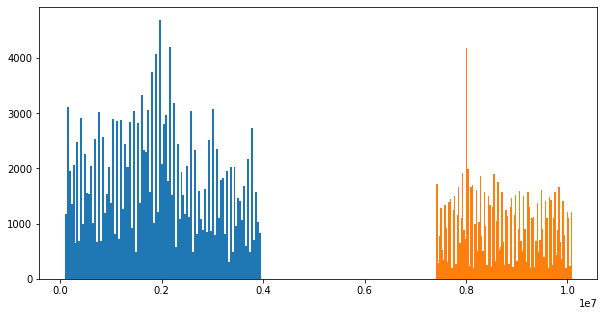

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.hist(train['TransactionDT'],100)
plt.hist(test['TransactionDT'],100)
plt.show()

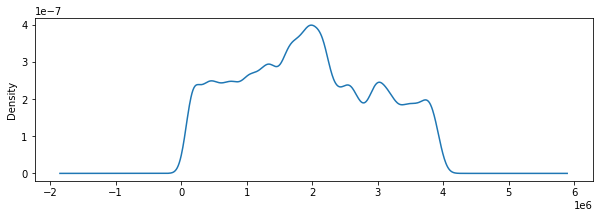

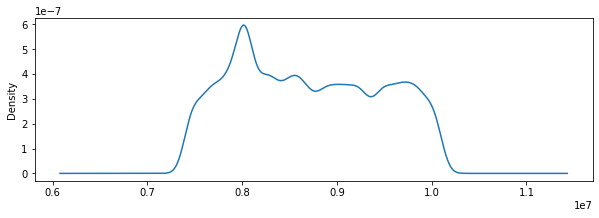

In [ ]:
plt.subplots(figsize = (10,3))
train['TransactionDT'].plot.kde()
plt.show()
plt.subplots(figsize = (10,3))
test['TransactionDT'].plot.kde()
plt.show()

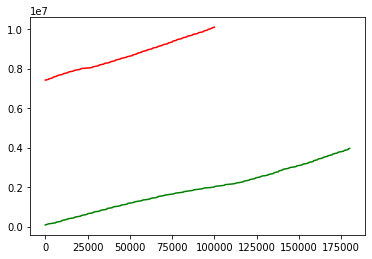

In [ ]:
plt.plot(train.TransactionDT, c='g')
plt.plot(test.TransactionDT, c='r')

# Задание 2

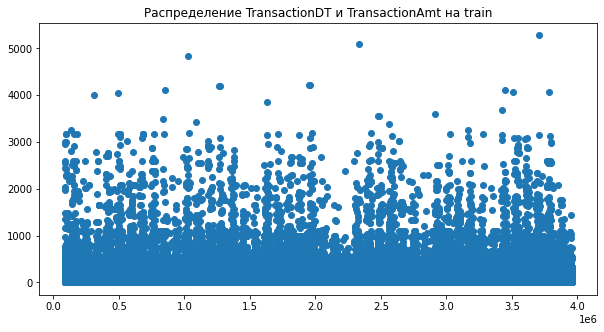

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(train['TransactionDT'],train['TransactionAmt'])
plt.title('Распределение TransactionDT и TransactionAmt на train')
plt.show()

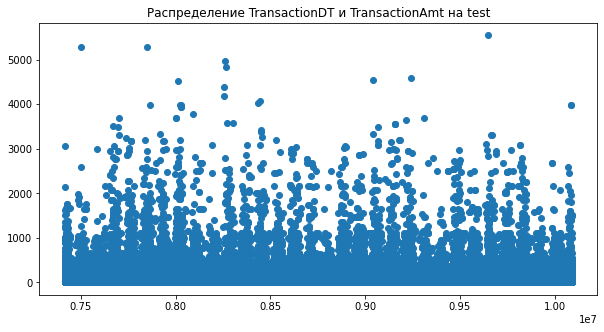

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(test['TransactionDT'],test['TransactionAmt'])
plt.title('Распределение TransactionDT и TransactionAmt на test')
plt.show()

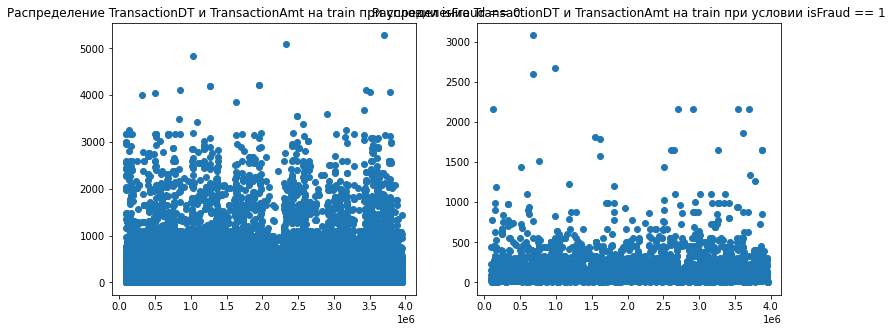

In [ ]:
fig,ax = plt.subplots(1, 2, figsize = (12,5))
ax[0].scatter(train[train['isFraud']==0]['TransactionDT'],train[train['isFraud']==0]['TransactionAmt'])
ax[1].scatter(train[train['isFraud']==1]['TransactionDT'],train[train['isFraud']==1]['TransactionAmt'])
ax[0].title.set_text('Распределение TransactionDT и TransactionAmt на train при условии isFraud == 0')
ax[1].title.set_text('Распределение TransactionDT и TransactionAmt на train при условии isFraud == 1')
plt.show()

# Задание 3

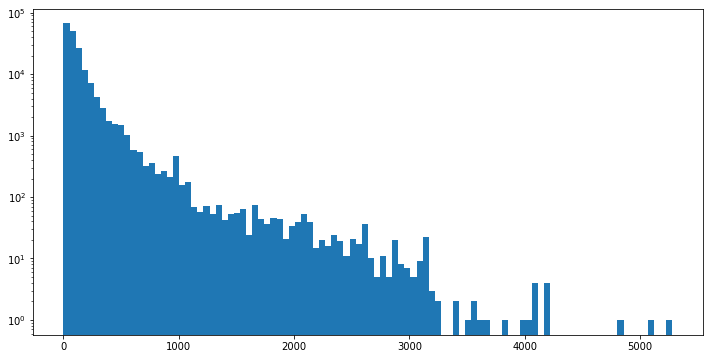

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.hist(train['TransactionAmt'],100,log=True)
plt.show()

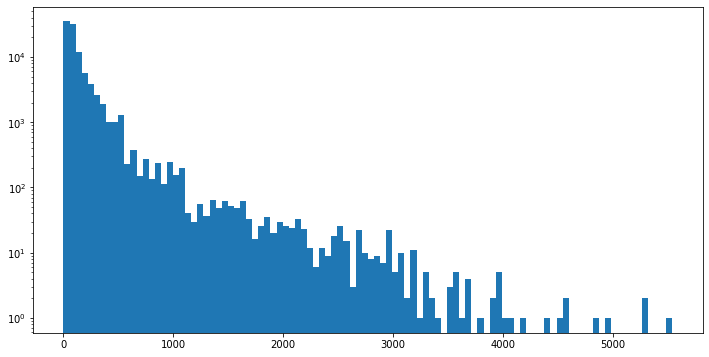

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.hist(test['TransactionAmt'],100,log=True)
plt.show()

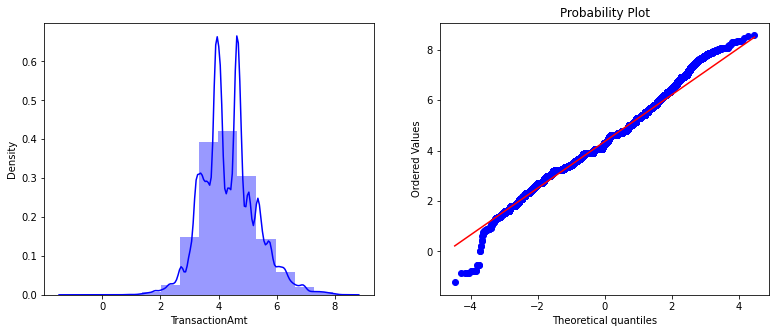

In [ ]:
import seaborn as sns
from scipy.stats import probplot, ks_2samp
c = np.log(train['TransactionAmt'])
fig = plt.figure(figsize=(13, 5))
plt.subplot(121)
sns.distplot(c, bins=15, color="blue")
plt.subplot(122)
probplot(c, plot=plt)
plt.show()

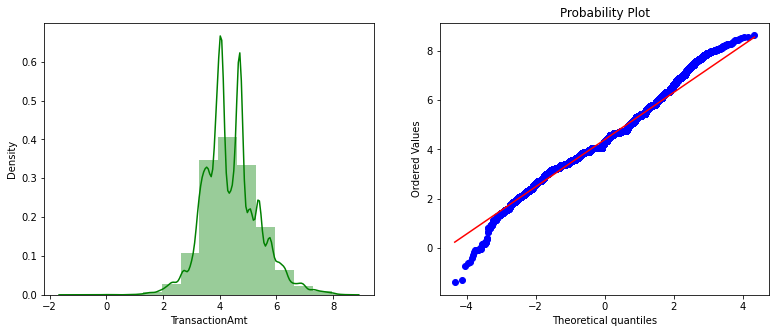

In [ ]:

g = np.log(test['TransactionAmt'])
fig = plt.figure(figsize=(13, 5))
plt.subplot(121)
sns.distplot(g, bins=15, color="green")
plt.subplot(122)
probplot(g, plot=plt)
plt.show()

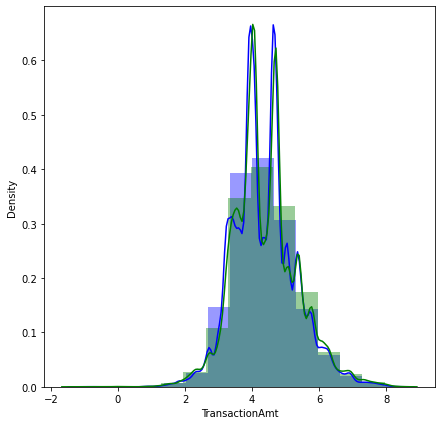

In [ ]:
fig = plt.figure(figsize=(7, 7))
sns.distplot(np.log(train['TransactionAmt']), bins=15, color="blue")
sns.distplot(np.log(test['TransactionAmt']), bins=15, color="green")

# Задание 4

In [ ]:
train= pd.read_csv('/content/assignment_2_train.csv')
test = pd.read_csv('/content/assignment_2_test.csv')

numerical_features = train.select_dtypes(include=[np.number]).columns
numerical_features = numerical_features.drop('isFraud')
y_train = train['isFraud']
y_test = test['isFraud']
object_features = train.select_dtypes(include=[np.object]).columns

A={}
for i in object_features:
    a={}
    value_counts=train[i].value_counts()
    for j in value_counts.index:
        a[j]=round(train[train[i]==j]['isFraud'].sum()/value_counts[j],10)*100
    A[i]=a

train_1=train.copy()
test_1 = test.copy()

for i in A:
    train_1[i] = train_1[i].map(A[i])
    test_1[i] = test_1[i].map(A[i])

In [ ]:
ProductCD = train.groupby('ProductCD').agg({'ProductCD':'count','isFraud':'sum'})
ProductCD['q'] = round((ProductCD['isFraud']/ProductCD['ProductCD'])*100,5)
ProductCD.sort_values(by=['q'],ascending =False, inplace=True)
ProductCD

ProductCD  isFraud        q
ProductCD                             
C              21664     2020  9.32422
S               3648      132  3.61842
H              22422      571  2.54661
W             110340     2046  1.85427
R              21926      372  1.69662

Text(0.5, 1.0, 'ProductCD и положительные исходы в каждой категории ')

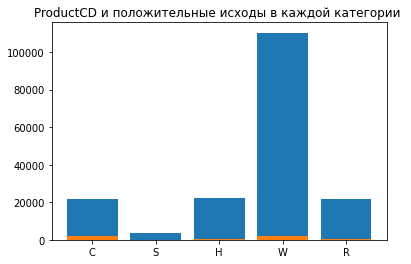

In [ ]:
plt.bar(ProductCD.index,ProductCD['ProductCD'])
plt.bar(ProductCD.index,ProductCD['isFraud'])
plt.title('ProductCD и положительные исходы в каждой категории ')

Text(0.5, 1.0, 'Доля в % положительных исходов в ProductCD')

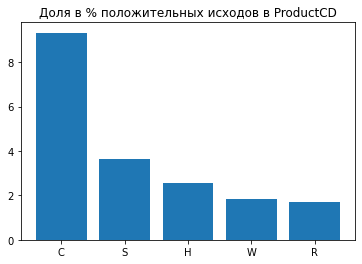

In [ ]:
plt.bar(ProductCD.index,ProductCD['q'])
plt.title('Доля в % положительных исходов в ProductCD')

In [ ]:
card4 = train.groupby('card4').agg({'card4':'count','isFraud':'sum'})
card4['q'] = round((card4['isFraud']/card4['card4'])*100,5)
card4.sort_values(by=['q'],ascending =False, inplace=True)
card4

card4  isFraud        q
card4                                     
discover            2378       87  3.65854
mastercard         54501     1744  3.19994
visa              118295     3234  2.73384
american express    4818       74  1.53591

Text(0.5, 1.0, 'Объем платежной системы и объем  положительных исходов в каждой категории ')

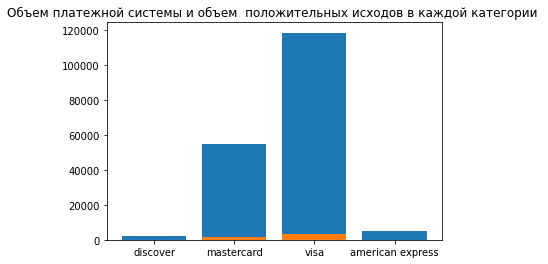

In [ ]:
plt.bar(card4.index,card4['card4'])
plt.bar(card4.index,card4['isFraud'])
plt.title('Объем платежной системы и объем  положительных исходов в каждой категории ')

Text(0.5, 1.0, 'Доля в % положительных исходов в каждой категории платежной системы')

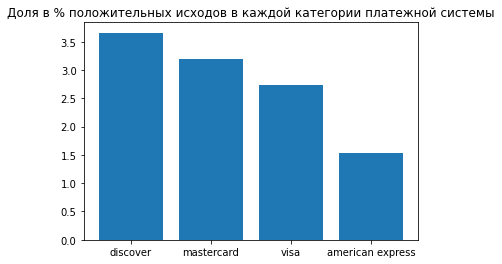

In [ ]:
plt.bar(card4.index,card4['q'])
plt.title('Доля в % положительных исходов в каждой категории платежной системы')

In [ ]:
card6 = train.groupby('card6').agg({'card6':'count','isFraud':'sum'})
card6['q'] = round((card6['isFraud']/card6['card6'])*100,5)
card6.sort_values(by=['q'],ascending =False, inplace=True)
card6

card6  isFraud        q
card6                                    
credit            57229     2545  4.44705
debit            122746     2594  2.11331
charge card           8        0  0.00000
debit or credit      10        0  0.00000

Text(0.5, 1.0, 'Объем вида карты системы и объем  положительных исходов в каждой категории ')

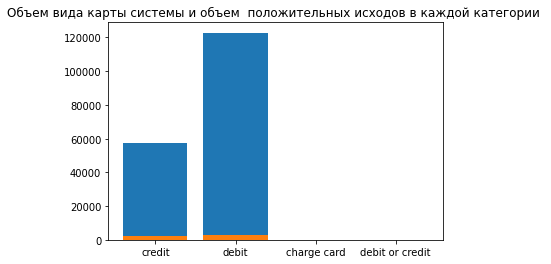

In [ ]:
plt.bar(card6.index,card6['card6'])
plt.bar(card6.index,card6['isFraud'])
plt.title('Объем вида карты системы и объем  положительных исходов в каждой категории ')

Text(0.5, 1.0, 'Доля в % положительных исходов в каждой категории')

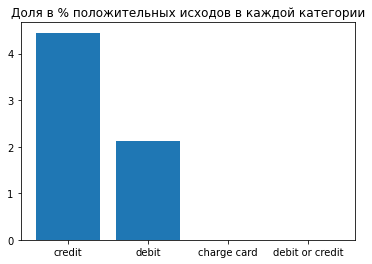

In [ ]:
plt.bar(card6.index,card6['q'])
plt.title('Доля в % положительных исходов в каждой категории')

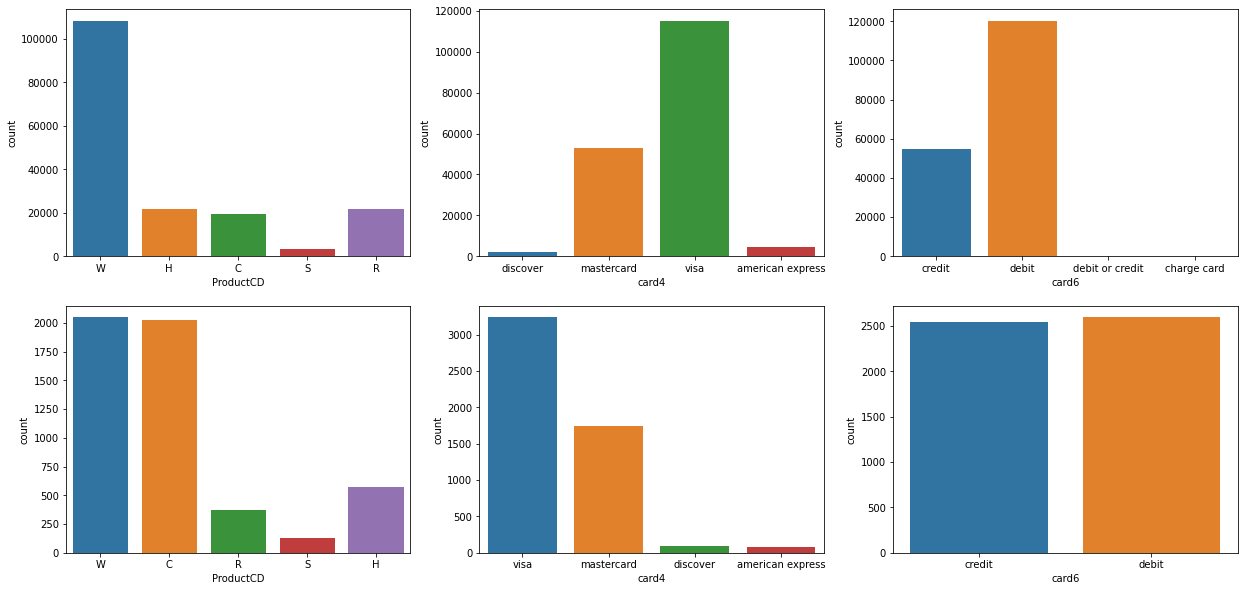

In [ ]:
features = ['ProductCD', 'card4', 'card6']

fig, axes = plt.subplots(2, 3, figsize=(21, 10))

for num, feature in enumerate(features):
    data = train[[feature, 'isFraud']]
    data_target_0 = data[data['isFraud'] == 0]
    data_target_1 = data[data['isFraud'] == 1]
    sns.countplot(x=feature, data=data_target_0, ax=axes[0, num], label='target_0')
    sns.countplot(x=feature, data=data_target_1, ax=axes[1, num], label='target_1')
    
plt.show()

Вывод:  
ProductCD - значение признака 'С' имеет линейную зависимость с целевой переменной
card4 - распределение целевой переменной не зависит от значений признака
card6 - целевая переменная чаще равна 0, если значение признака = 'debit'